In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
Data=pd.read_csv("/content/drive/My Drive/model 1/GiveMeSomeCredit/cs-training.csv",header=0)

In [0]:
Data.shape

(150000, 12)

In [0]:
Data.head()

,Unnamed,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [0]:
Data.dtypes

Unnamed                                   int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [0]:
Data.describe()

,Unnamed,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [0]:
Data.isnull().sum()

Unnamed                                     0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [0]:
Data['MonthlyIncome'].fillna(Data['MonthlyIncome'].mean(),inplace=True)
Data['NumberOfDependents'].fillna(Data['NumberOfDependents'].mode(),inplace=True)

In [0]:
def explore_data(data) :
      return pd.DataFrame({"No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})

In [6]:
explore_data(Data)

,No of Levels,Levels
Unnamed,150000,[1.00000e+00 2.00000e+00 3.00000e+00 ... 1.499...
SeriousDlqin2yrs,2,[1. 0.]
RevolvingUtilizationOfUnsecuredLines,125728,[0.76612661 0.95715102 0.65818014 ... 0.299745...
age,86,[ 45. 40. 38. 30. 49. 74. 57. 39. 27. ...
NumberOfTime30-59DaysPastDueNotWorse,16,[ 2. 0. 1. 3. 4. 5. 7. 10. 6. 98. 12. ...
DebtRatio,114194,[0.80298213 0.1218762 0.08511338 ... 0.404292...
MonthlyIncome,13595,[ 9120. 2600. 3042. ... 15648. 521. 7647.]
NumberOfOpenCreditLinesAndLoans,58,[13. 4. 2. 5. 7. 3. 8. 9. 6. 10. 14. 2...
NumberOfTimes90DaysLate,19,[ 0. 1. 3. 2. 5. 4. 98. 10. 9. 6. 7. ...
NumberRealEstateLoansOrLines,28,[ 6. 0. 1. 3. 4. 2. 5. 8. 7. 9. 17. 1...


In [0]:
Data.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [0]:
Data.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

In [0]:

Data['SeriousDlqin2yrs']=Data['SeriousDlqin2yrs'].astype('category')
Data['NumberOfTime30-59DaysPastDueNotWorse']=Data['NumberOfTime30-59DaysPastDueNotWorse'].astype('category')
Data['NumberOfOpenCreditLinesAndLoans']=Data['NumberOfOpenCreditLinesAndLoans'].astype('category')
Data['NumberOfTimes90DaysLate']=Data['NumberOfTimes90DaysLate'].astype('category')
Data['NumberRealEstateLoansOrLines']=Data['NumberRealEstateLoansOrLines'].astype('category')
Data['NumberOfTime60-89DaysPastDueNotWorse']=Data['NumberOfTime60-89DaysPastDueNotWorse'].astype('category')
Data['NumberOfDependents']=Data['NumberOfDependents'].astype('category')


In [0]:
Data.dtypes

SeriousDlqin2yrs                        category
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse    category
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans         category
NumberOfTimes90DaysLate                 category
NumberRealEstateLoansOrLines            category
NumberOfTime60-89DaysPastDueNotWorse    category
NumberOfDependents                      category
dtype: object

In [0]:
for col in ('RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','age'):
    Data[col] = Data[col].astype('int8')

In [0]:
Data.drop(['Unnamed'],axis=1,inplace=True)

# **EDA**

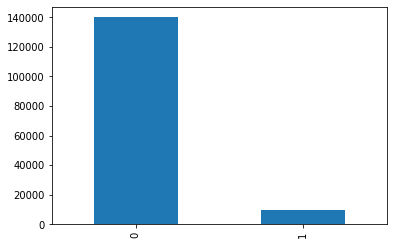

In [0]:
Data['SeriousDlqin2yrs'].value_counts().plot.bar()

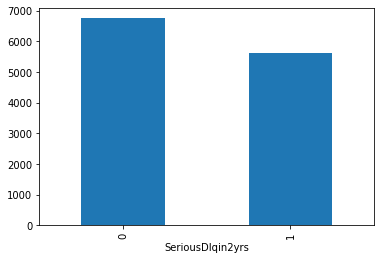

In [0]:
Data.groupby('SeriousDlqin2yrs')['MonthlyIncome'].mean().plot.bar()

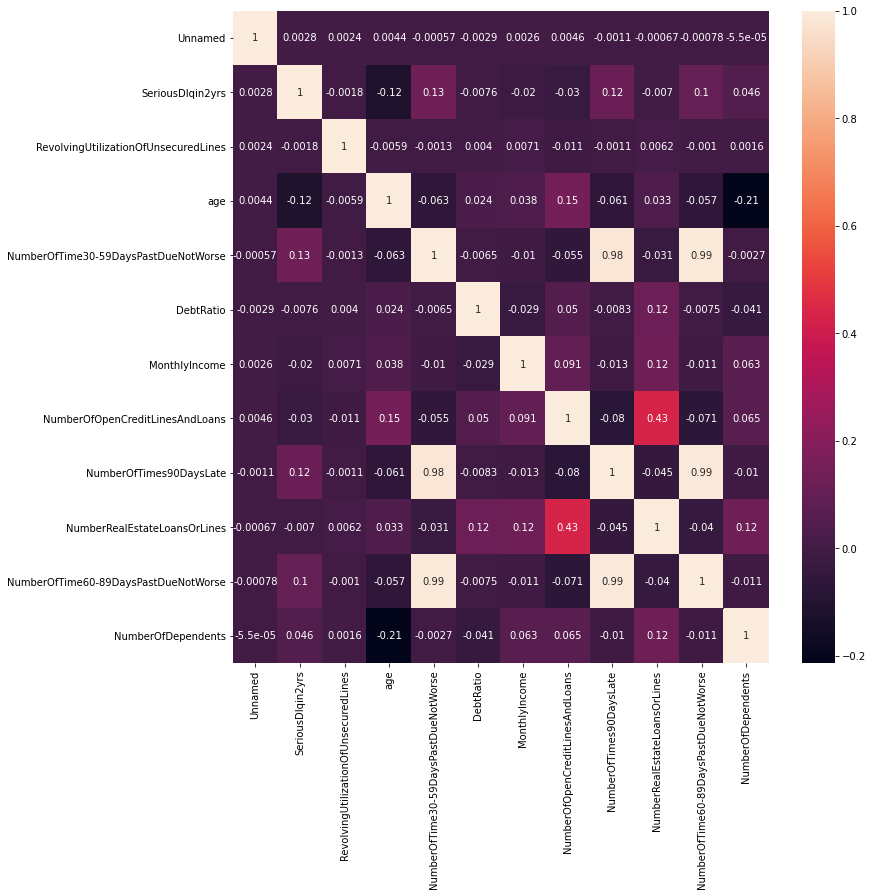

In [0]:
cor=Data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,ax=ax)

In [0]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [0]:
cato_attr = list(Data.select_dtypes("category").columns)
nume_attr = list(Data.columns.difference(cato_attr))

In [0]:
cato_attr.remove('SeriousDlqin2yrs')

In [12]:
print(nume_attr)
print(cato_attr)

['DebtRatio', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'age']
['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [0]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])



categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value="missing_value")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, nume_attr),
        ('cat', categorical_transformer, cato_attr)])

In [14]:
X=Data.drop(["SeriousDlqin2yrs"],axis=1)
Y=pd.DataFrame(Data['SeriousDlqin2yrs'])
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (150000, 10)
Y.shape:  (150000, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [0]:
print(X_train.shape)
print(X_test.shape)

(105000, 10)
(45000, 10)


In [0]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
33237,0.506878,45,0,2460.500000,1.000000,19,0,4,0,3.0
98431,0.075748,69,0,0.295490,5830.000000,7,0,2,0,0.0
13250,0.242598,57,0,1720.000000,6670.221237,9,0,1,0,0.0
60278,0.054781,40,0,0.140371,7700.000000,4,0,0,0,4.0
145808,0.133175,65,1,0.215749,4050.000000,19,0,0,0,1.0


# **LOGISTIC REGRESSION**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [0]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [0]:
train_log_pred = log_reg.predict(X_train)
test_log_pred = log_reg.predict(X_test)

In [0]:
print(accuracy_score(y_test,test_log_pred))

0.937


In [0]:
from sklearn.metrics import roc_auc_score
log=roc_auc_score(y_test, test_log_pred)
print('roc ',log)

roc  0.5857357295695793


# **DECISION TREE**

In [0]:
from sklearn import tree
dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', tree.DecisionTreeClassifier())])

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:

param_grid = {"classifier__criterion": ["gini", "entropy"],
              "classifier__min_samples_split": [2, 10, 20],
              "classifier__max_depth": [None, 2, 5, 10],
              "classifier__min_samples_leaf": [1, 5, 10],
              "classifier__max_leaf_nodes": [None, 5, 10, 20],
              }
clf_dtRandom =  RandomizedSearchCV(dt_clf,param_distributions=param_grid,cv=10)
clf_dtRandom.fit(X=X_train, y=y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                    

In [0]:
train_dtgrid_pred = clf_dtRandom.predict(X_train)
test_dtgrid_pred = clf_dtRandom.predict(X_test)

In [0]:
print(accuracy_score(y_test,test_dtgrid_pred))

0.9371555555555555


In [0]:
from sklearn.metrics import roc_auc_score
DT_random=roc_auc_score(y_test, test_dtgrid_pred)
print('roc ',DT_random)

roc  0.5793331183040406


# **RANDOM FOREST WITH RANDOM SEARCH**

In [0]:
 from sklearn.ensemble import RandomForestClassifier
rfb_clf_grid = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [0]:
rfc_param_grid = {"classifier__n_estimators" : [9, 18, 27, 36, 45, 54, 63],
                  "classifier__max_depth" : [2,3,5,7],
                  "classifier__min_samples_leaf" : [2, 4]}

rfc_grid = RandomizedSearchCV(rfb_clf_grid,param_distributions=rfc_param_grid, cv=5)
rfc_grid.fit(X_train,y_train)

In [0]:
train_rfcgrid_pred = rfc_grid.predict(X_train)
test_rfcgrid_pred = rfc_grid.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
print(accuracy_score(y_test,test_rfcgrid_pred))

0.9342666666666667


In [0]:
from sklearn.metrics import roc_auc_score

In [0]:

RF_random=roc_auc_score(y_test, test_rfcgrid_pred)
print('roc ',RF_random)

roc  0.5115358652604778


# **XGBOOST**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [21]:
xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])
clf_param_grid = {'classifier__colsample_bytree': np.linspace(0.5, 0.9, 2),
                  'classifier__n_estimators':[100],
                  'classifier__max_depth': [10, 15]}
clf_randomgrid = RandomizedSearchCV(xgb_clf, param_distributions=clf_param_grid, cv=5)                 

clf_randomgrid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                     

In [0]:
train_xgboost = clf_randomgrid.predict(X_train)
test_xgboost= clf_randomgrid.predict(X_test)

In [64]:
print(accuracy_score(y_test,test_xgboost))

0.9359777777777778


In [65]:
from sklearn.metrics import roc_auc_score
XG_random=roc_auc_score(y_test, test_xgboost)
print('roc ',XG_random)

roc  0.5853424598153315


# **TEST DATA**

In [0]:
test=pd.read_csv("/content/drive/My Drive/model 1/GiveMeSomeCredit/cs-test.csv",header=0)

In [26]:
test.head()

,Unamed,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [0]:
test.drop(['SeriousDlqin2yrs','Unamed'],axis=1,inplace=True)

In [29]:
test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

In [0]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(),inplace=True)
test['NumberOfDependents'].fillna(test['NumberOfDependents'].mode(),inplace=True)

In [0]:
pro2=clf_randomgrid.predict_proba(test)

In [0]:
sample=pd.read_csv('/content/drive/My Drive/model 1/GiveMeSomeCredit/sampleEntry.csv')

In [34]:
sample.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [0]:
sample.drop('Probability',axis=1,inplace=True)

In [0]:
sample['Probability']=pro

In [47]:
sample.head()

,Id,Probability
0,1,0.937551
1,2,0.957356
2,3,0.986317
3,4,0.921008
4,5,0.890443


In [0]:
sample.to_csv('submission.csv',index=False)

In [0]:
import pickle
s = pickle.dumps(clf_randomgrid)

In [67]:
from joblib import dump, load
dump(clf_randomgrid, 'problem1.joblib') 

['problem1.joblib']